In [1]:
import sys
sys.path.append('../../lib/')
from frustration_traditional import *
import numpy as np

In [2]:
L = 20
T = 1
ratio = 0.9

vals = thermalization(L, T, ratio, 0, 10)

In [3]:
vals

[1,
 0.9,
 0.001422,
 7.774799032772491e-05,
 0.0027377484999999997,
 0.00012918667779225528,
 -1.43066149613668]

In [4]:
N = 1000
ratios = np.linspace(0, 1, N)
Ts = np.linspace(0.1, 3.5, N)

res = transition(L, Ts, ratios, err_runs=10, workers=12)

In [5]:
res

,T,ratio,M,M_std,X,X_std,U
0,0.1,0.000000,1.000000,0.000000,0.000000,0.000000,0.666667
1,0.1,0.010101,1.000000,0.000000,0.000000,0.000000,0.666667
2,0.1,0.020202,1.000000,0.000000,0.000000,0.000000,0.666667
3,0.1,0.030303,1.000000,0.000000,0.000000,0.000000,0.666667
4,0.1,0.040404,1.000000,0.000000,0.000000,0.000000,0.666667
...,...,...,...,...,...,...,...
9995,3.5,0.959596,0.034049,0.000868,0.075776,0.003875,0.011493
9996,3.5,0.969697,0.033534,0.000811,0.074228,0.003152,-0.008678
9997,3.5,0.979798,0.033283,0.000621,0.072039,0.003094,0.002250
9998,3.5,0.989899,0.033147,0.000760,0.071281,0.002347,0.015073


In [6]:
U_matrix = np.zeros((N, N))

In [7]:
for i in range(N):
    U_matrix[i, :] = res[res['T'] == Ts[i]]['U']

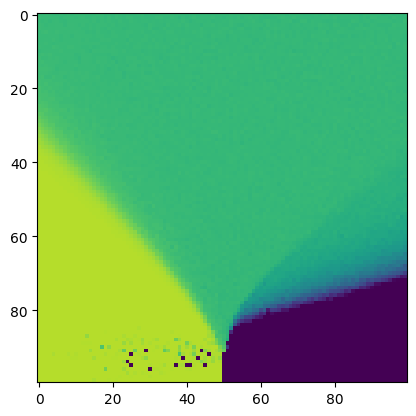

In [8]:
import matplotlib.pyplot as plt

plt.imshow(U_matrix[::-1, :], vmax=1, vmin=-2)